## Importing required files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [2]:

df = pd.read_csv("C:\\Users\\padixit\\OneDrive - Capgemini\\UpGrad\Additional Assignment\\transactions.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155181 entries, 0 to 155180
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Customer ID           155181 non-null  int64 
 1   Transaction Type      155181 non-null  object
 2   Amount [EUR]          155181 non-null  int64 
 3   Counterparty country  155181 non-null  object
dtypes: int64(2), object(2)
memory usage: 4.7+ MB


In [4]:
df.shape

(155181, 4)

In [5]:
df.describe()

,Customer ID,Amount [EUR]
count,155181.000000,155181.000000
mean,5002.995457,4982.829180
std,2880.680223,1724.218339
min,0.000000,-2187.000000
25%,2512.000000,3910.000000
50%,5030.000000,5001.000000
75%,7483.000000,6087.000000
max,9999.000000,244351.000000


In [6]:
df.head()

,Customer ID,Transaction Type,Amount [EUR],Counterparty country
0,8345,Debit,4342,SE
1,3138,Debit,5852,SE
2,5233,Debit,3517,SE
3,8634,Debit,5325,DK
4,8076,Credit,4815,SE


In [7]:
df.groupby('Counterparty country')['Amount [EUR]'].count()

Counterparty country
DK    51668
FI    51734
RO      331
SE    51448
Name: Amount [EUR], dtype: int64

In [8]:
df.groupby('Transaction Type')['Amount [EUR]'].count()

Transaction Type
Credit    77710
Debit     77471
Name: Amount [EUR], dtype: int64

In [9]:
df.isnull().sum()

Customer ID             0
Transaction Type        0
Amount [EUR]            0
Counterparty country    0
dtype: int64

## Visualise existing data 

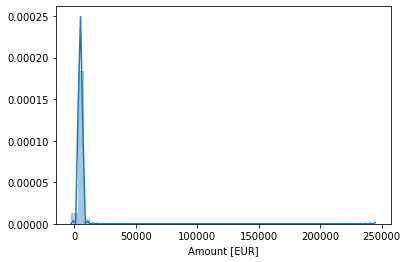

In [10]:
sns.distplot(df['Amount [EUR]'])
plt.show();

## Observation
### We can see that the transaction amount is skewed right with many smaller values and a few large values.
### The majority of the transactions types are: CERDIT and DEBIT

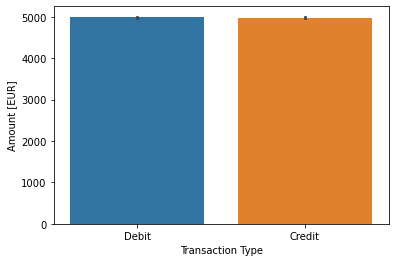

In [11]:
sns.barplot(x="Transaction Type", y="Amount [EUR]", data=df)
plt.show()

## Creating New Features

What would be a warning sign for fraud or money laundering activities?

Based on my experience in the banking industry, irregularly large transaction volume from an account is a red flag.

Let’s create two new features to account for the transaction volume:

#amt_sum: the accumulative amounts into an account.
#amt_count: the count of transactions from an account


In [12]:
# get the sum of the previous cerdit transaction amounts. 
grouped_multiple = df.groupby(['Customer ID', 'Transaction Type', 'Counterparty country']).agg({'Amount [EUR]': ['sum', 'count']})
grouped_multiple.columns = ['amt_sum', 'amt_count']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)

       Customer ID Transaction Type Counterparty country  amt_sum  amt_count
0                0           Credit                   DK    21425          5
1                0           Credit                   SE    21065          5
2                0            Debit                   DK    11477          3
3                0            Debit                   FI    13976          3
4                0            Debit                   SE     9226          3
...            ...              ...                  ...      ...        ...
56162         9999           Credit                   FI    15100          4
56163         9999           Credit                   SE    28482          8
56164         9999            Debit                   DK    18082          5
56165         9999            Debit                   FI     3664          1
56166         9999            Debit                   SE     3376          1

[56167 rows x 5 columns]


In [13]:
grouped_multiple.head(20)

,Customer ID,Transaction Type,Counterparty country,amt_sum,amt_count
0,0,Credit,DK,21425,5
1,0,Credit,SE,21065,5
2,0,Debit,DK,11477,3
3,0,Debit,FI,13976,3
4,0,Debit,SE,9226,3
5,1,Credit,DK,3506,1
6,1,Credit,FI,8352,2
7,1,Credit,SE,13390,3
8,1,Debit,DK,9418,2
9,1,Debit,FI,17241,4


In [14]:
grouped_multiple.groupby(['Transaction Type', 'Counterparty country']).agg({'amt_sum': ['sum', 'count']})

amt_sum      
                                             sum count
Transaction Type Counterparty country                 
Credit           DK                    127761072  9304
                 FI                    130200566  9333
                 RO                       673974    82
                 SE                    128221617  9333
Debit            DK                    130011384  9377
                 FI                    127819420  9316
                 RO                       637342    81
                 SE                    127915040  9341

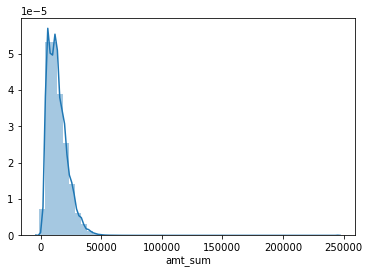

In [15]:
sns.distplot(grouped_multiple['amt_sum'], bins=50) 

## Observation:
### It observed that high number transcation i.e. debit and cerdit is done for less than 500000

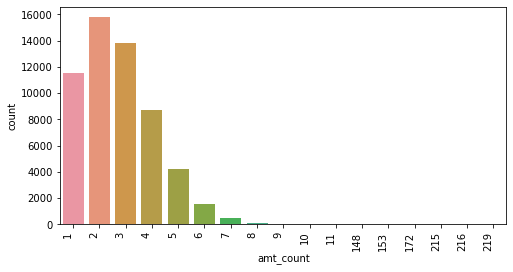

In [16]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='amt_count', data= grouped_multiple)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

## Observation:
### There are some high amount transaction done with less frequency 

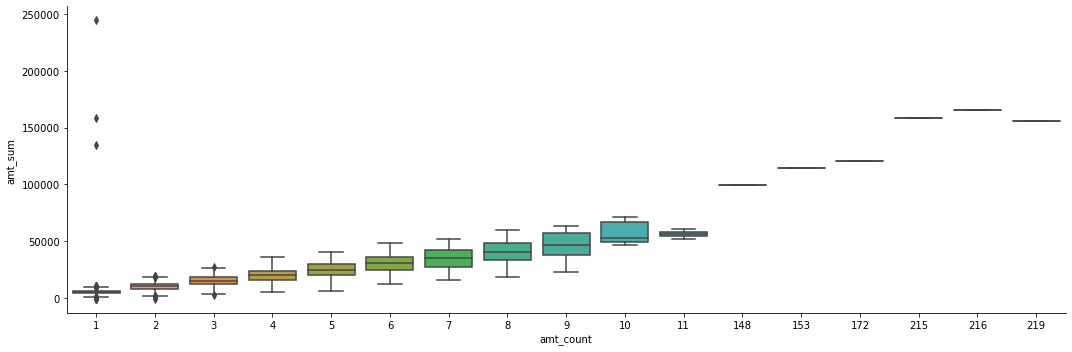

In [17]:
sns.catplot(x="amt_count", y="amt_sum", 
             kind="box", data= grouped_multiple, 
             aspect=3.0)
plt.show()

## Observation:
### There is a positive correlation between the transaction amount and trasaction count